# Plot Results from Fitting PC-SAFT Parameters to Guadagno's Data

Using the PC-SAFT parameters that Huikuan fit to the FTIR data from Guadagno and Kazarian (2004) of CO2 solubility in 2700 g/mol PPG, I calculated the interfacial tension using DFT. I will compare these predictions with the experimentally measured interfacial tension to estimate the discrepancy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import dataproc
import plot

from importlib import reload

reload(dataproc)

# System parameters
# molecular weight of CO2
mw_co2 = 44.01
# conversion of m3 per mL
m3_per_mL = 1E-6
# Save plots?
save_plots = True
# file path to saved data
data_folder = '../g-adsa_results/'
# csv data files
csv_file_list = ['1k2f_30c', '1k3f_30c', '1k2f_60c', '1k3f_30c', '1k3f_60c', '3k2f_31c', '3k2f_60c_lop', '3k2f_60c_hip']
# folder of csv data files for DFT predictions of interfacial tension
dft_data_folder = 'dft_pred/3k2f_guadagno/'

Loads data into data structure.

In [2]:
d = dataproc.load_proc_data(csv_file_list, data_folder)

Plot DFT predictions alongside experimental measurements.

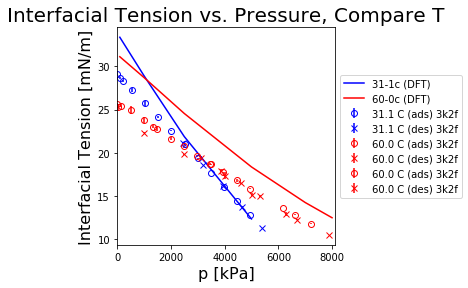

In [10]:
reload(dataproc)
tag_list = ['3k2f_31c', '3k2f_60c_lop', '3k2f_60c_hip']
color_list = ['b', 'r', 'r']
dft_tag_list = ['31-1c', '60-0c']

# loads dft predictions into a similarly structured dictionary
d_dft = dataproc.load_dft(dft_data_folder)

# plots the measured interfacial tension first
for i in range(len(tag_list)):
    tag = tag_list[i]
    color = color_list[i]
    if i == 0:
        ax = plot.plot_errorbars_ads_des(d[tag]['p'], d[tag]['if_tension'], d[tag]['s_if_tension'], d[tag]['p'], d[tag]['T'], 
                                         color=color, xlabel='p [kPa]', ylabel='Interfacial Tension [mN/m]', 
                                         title='Interfacial Tension vs. Pressure, Compare T', label_tag=tag[:4])
    else:
        ax = plot.plot_errorbars_ads_des(d[tag]['p'], d[tag]['if_tension'], d[tag]['s_if_tension'], d[tag]['p'], d[tag]['T'], 
                                         color=color, ax=ax, label_tag=tag[:4])
        
# then plots predictions from DFT
for i in range(len(dft_tag_list)):
    tag = dft_tag_list[i]
    color = color_list[i]
    ax.plot(d_dft[tag]['p'], d_dft[tag]['if_tension'], color=color, label=tag + ' (Guadagno-based DFT)')


# put legend outside of plot box
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend(loc='center left', bbox_to_anchor=(legend_x, legend_y))# save figure

ax.set_xlim([0,8100])
if save_plots:
    plt.savefig(data_folder + '3k2f_guadagno_if_tension_dft.pdf', bbox_inches='tight')

### Compare Interfacial Tension when Plotted as a Function of Solubility

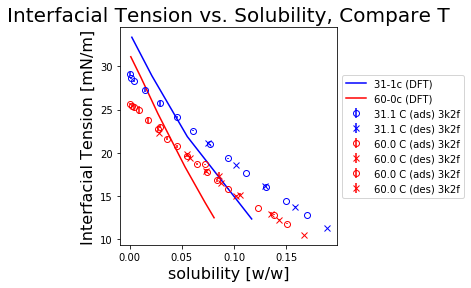

In [13]:
reload(dataproc)
tag_list = ['3k2f_31c', '3k2f_60c_lop', '3k2f_60c_hip']
color_list = ['b', 'r', 'r']
dft_tag_list = ['31-1c', '60-0c']

# loads dft predictions into a similarly structured dictionary
d_dft = dataproc.load_dft(dft_data_folder)

# plots the measured interfacial tension first
for i in range(len(tag_list)):
    tag = tag_list[i]
    color = color_list[i]
    if i == 0:
        ax = plot.plot_errorbars_ads_des(d[tag]['solub'], d[tag]['if_tension'], d[tag]['s_if_tension'], d[tag]['p'],
                                         d[tag]['T'], 
                                         color=color, xlabel='solubility [w/w]', ylabel='Interfacial Tension [mN/m]', 
                                         title='Interfacial Tension vs. Solubility, Compare T', label_tag=tag[:4])
    else:
        ax = plot.plot_errorbars_ads_des(d[tag]['solub'], d[tag]['if_tension'], d[tag]['s_if_tension'], d[tag]['p'], 
                                         d[tag]['T'], 
                                         color=color, ax=ax, label_tag=tag[:4])
        

for i in range(len(dft_tag_list)):
    tag = dft_tag_list[i]
    color = color_list[i]
    ax.plot(d_dft[tag]['solub'], d_dft[tag]['if_tension'], color=color, label=tag + ' (Guadagno-based DFT)')


# put legend outside of plot box
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend(loc='center left', bbox_to_anchor=(legend_x, legend_y))# save figure

if save_plots:
    plt.savefig(data_folder + '3k2f_guadagno_if_tension_vs_solub_dft.pdf', bbox_inches='tight')

## Compare Solubility

Just want to make sure that the PC-SAFT calculations I made with the parameters Huikuan fit match Guadagno and Kazarian's results.

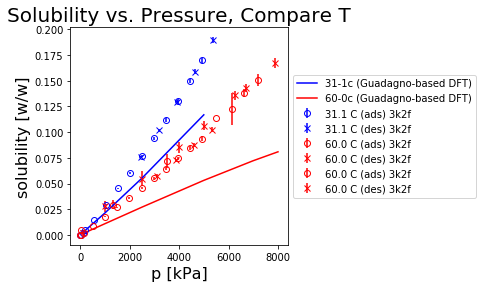

In [8]:
reload(dataproc)
tag_list = ['3k2f_31c', '3k2f_60c_lop', '3k2f_60c_hip']
color_list = ['b', 'r', 'r']
dft_tag_list = ['31-1c', '60-0c']

# loads dft predictions into a similarly structured dictionary
d_dft = dataproc.load_dft(dft_data_folder)

# plots the measured interfacial tension first
for i in range(len(tag_list)):
    tag = tag_list[i]
    color = color_list[i]
    if i == 0:
        ax = plot.plot_errorbars_ads_des(d[tag]['p'], d[tag]['solub'], d[tag]['s_solub'], d[tag]['p'], d[tag]['T'], 
                                         color=color, xlabel='p [kPa]', ylabel='solubility [w/w]', 
                                         title='Solubility vs. Pressure, Compare T', label_tag=tag[:4])
    else:
        ax = plot.plot_errorbars_ads_des(d[tag]['p'], d[tag]['solub'], d[tag]['s_solub'], d[tag]['p'], d[tag]['T'], 
                                         color=color, ax=ax, label_tag=tag[:4])
        

for i in range(len(dft_tag_list)):
    tag = dft_tag_list[i]
    color = color_list[i]
    ax.plot(d_dft[tag]['p'], d_dft[tag]['solub'], color=color, label=tag + ' (Guadagno-based DFT)')


# put legend outside of plot box
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend(loc='center left', bbox_to_anchor=(legend_x, legend_y))# save figure

Compare Guadagno's data against PC-SAFT fit.

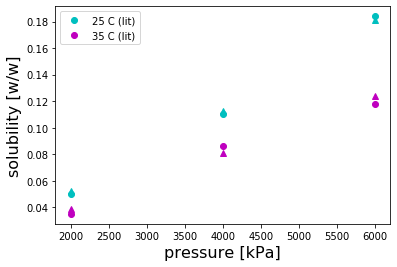

In [5]:
# plot data from Guadagno and Kazarian (2004) JPCB at 25 C and 35 C
p_3k2f_lit = np.array([2000, 4000, 6000])
solub_3k2f_25_lit = np.array([0.05, 0.11, 0.184])
solub_3k2f_35_lit = np.array([0.035, 0.086, 0.118])

# plot solubility vs. p
ax = plot.plot_line(p_3k2f_lit, solub_3k2f_25_lit, marker='o', color='c', label='25 C (lit)', xlabel='pressure [kPa]',
                   ylabel='solubility [w/w]')
ax = plot.plot_line(p_3k2f_lit, solub_3k2f_35_lit, ax=ax, marker='o', color='m', label='35 C (lit)')
plt.legend()


# computations based on PC-SAFT
rho_co2_25 = np.array([0.0361589, 0.0779784, 0.125021])
rho_poly_25 = np.array([0.658226, 0.614748, 0.56568])
solub_25_pc = rho_co2_25 / (rho_co2_25 + rho_poly_25)

rho_co2_35 = np.array([0.0269141, 0.0556623, 0.0850494])
rho_poly_35 = np.array([0.661922, 0.632017, 0.601429])
solub_35_pc = rho_co2_35 / (rho_co2_35 + rho_poly_35)

ax = plot.plot_line(p_3k2f_lit, solub_25_pc, ax=ax, marker='^', color='c', label='25 C (PC-SAFT)')
ax = plot.plot_line(p_3k2f_lit, solub_35_pc, ax=ax, marker='^', color='m', label='35 C (PC-SAFT)')